https://geocoding.geo.census.gov/geocoder/Geocoding_Services_API.pdf

In [13]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import requests
import re, csv

In [14]:
 # geocode each spreadsheet 
 def censusGeocode(file, output):
     url = 'https://geocoding.geo.census.gov/geocoder/geographies/addressbatch?form'
     payload = {'benchmark':'Public_AR_Current',
                'vintage':'Current_Current',}
     files = {'addressFile': open(file)}
     r = requests.post(url, files=files, data=payload)
     results = str(r.text)
     results = re.sub('"','',results)
     results = results.split('\n')
     with open(output, 'w', newline = '') as geocodeOutput:
         w = csv.writer(geocodeOutput, delimiter=',')
         w.writerows([c.strip() for c in r.split(',')] for r in results)

In [15]:
dfAll = pd.read_csv('./data/NCSBE/ncvoter_Wake.zip')
numRecs = dfAll.shape[0]

In [ ]:
fromID = 0
toID = fromID+1000
while fromID < numRecs:
    #Status
    print(toID,end=";")
    #Get the chunk of values
    address_set = dfAll.iloc[fromID:toID,1:-2].dropna(how='any')
    #Write out the address file
    address_set.to_csv('Addresses.csv'.format(fromID),index=True,header=False)
    #Update the output filename
    outFile = 'GeoCode_{}.csv'.format(toID)
    #Geocode
    censusGeocode('Addresses.csv',outFile)
    #Update the counters
    fromID = toID
    toID = fromID + 10000

In [17]:
#Convert output to dataframe
names = ['address','county','state','zip','match','match_type','address_2','county_2','state_2',
         'zip_2','longitude','latitude','side','block10','st_fips','co_fips','census_2','census_3']
dtypes = {'address':'str','county':'str','state':'str','zip':'str','match':'str','match_type':'str',
           'address_2':'str','county_2':'str','state_2':'str','zip_2':'str',
           'longitude':'float','latitude':'float','side':'str','block10':'str','st_fips':'str',
           'co_fips':'str','census_2':'str','census_3':'str'}
df = pd.read_csv('GeoCode_1000.csv',header=None,names=names,dtype=dtypes)

In [31]:
df.match.unique()

array(['Match', 'No_Match', 'Tie', nan], dtype=object)

In [23]:
geom = [Point(x,y) for x, y in zip(df.longitude,df.latitude)]

In [28]:
gdf = gpd.GeoDataFrame(df, geometry=geom)

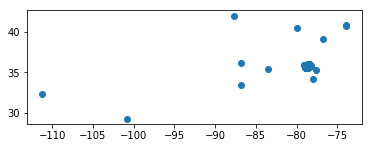

In [30]:
%matplotlib inline
gdf.plot()